In [2]:
 !pip install -qq google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.5 MB/s eta 0:00:00


In [4]:
import json
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from pygments import highlight
from pygments.lexers import JsonLexer
from pygments.formatters import TerminalFormatter

from google_play_scraper import Sort, reviews, app

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

In [12]:
app_packages = [
    'com.anydo',
    'com.todoist',
    'com.ticktick.task',
    'com.habitrpg.android.habitica',
    'cc.forestapp',
    'com.oristats.habitbull',
    'com.levor.liferpgtasks',
    'com.habitnow',
    'com.microsoft.todos',
    'prox.lab.calclock',
    'com.gmail.jmartindev.timetune',
    'com.artfulagenda.app',
    'com.tasks.android',
    'com.appgenix.bizcal',
    'com.appxy.planner'
]


In [16]:
app_infos = []

for ap in tqdm(app_packages):
  print(ap)
  info = app(ap,lang='en',country='us')
  del info['comments']
  app_infos.append(info)

  7%|▋         | 1/15 [00:00<00:02,  5.69it/s]

com.anydo
com.todoist


 20%|██        | 3/15 [00:00<00:02,  5.97it/s]

com.ticktick.task
com.habitrpg.android.habitica


 33%|███▎      | 5/15 [00:00<00:01,  5.96it/s]

cc.forestapp
com.oristats.habitbull


 47%|████▋     | 7/15 [00:01<00:02,  3.74it/s]

com.levor.liferpgtasks
com.habitnow


 60%|██████    | 9/15 [00:02<00:01,  4.18it/s]

com.microsoft.todos
prox.lab.calclock


 73%|███████▎  | 11/15 [00:02<00:00,  5.12it/s]

com.gmail.jmartindev.timetune
com.artfulagenda.app


 87%|████████▋ | 13/15 [00:02<00:00,  5.48it/s]

com.tasks.android
com.appgenix.bizcal


100%|██████████| 15/15 [00:03<00:00,  4.86it/s]

com.appxy.planner


In [14]:
def print_json(json_object):
  json_str = json.dumps(
      json_object,
      indent=2,
      sort_keys=True,
      default=str
  )
  print(highlight(json_str, JsonLexer(), TerminalFormatter()))

In [17]:
print_json(app_infos[0])

{
  "adSupported": false,
  "appId": "com.anydo",
  "categories": [
    {
      "id": "PRODUCTIVITY",
      "name": "Productivity"
    }
  ],
  "containsAds": false,
  "contentRating": "Everyone",
  "contentRatingDescription": null,
  "currency": "USD",
  "description": "\ud83e\udd47 <b>\"#1 To do list app out there\u201d</b> - WSJ\r\n\ud83c\udfc6 <b>Editor's Choice</b> by Google\r\n\r\nOver +40M people, families and teams rely on Any.do to stay organized and get more done. It's a simple and powerful to do list app with built in tasks, reminders, daily planner and calendar - all-in-one.\r\n\r\n<b>\ud83e\udd47 \"A MUST HAVE APP\" (Lifehacker, NYTimes, USA TODAY).</b>\r\n\r\nAny.do is a free to-do list, planner & calendar app for managing and organizing your daily tasks, to-do lists, notes, reminders, checklists, calendar events, grocery lists, and more.\r\n\r\nOrganize your tasks & to-do list\r\n\r\n\u2022 ADVANCED CALENDAR & DAILY PLANNER - Keep your to-do list and calendar events alwa

In [23]:
def format_title(title):
  sep_index = title.find(':') if title.find(':') != -1 else title.find('-')
  if sep_index != -1:
    title = title[:sep_index]
  return title[:10]

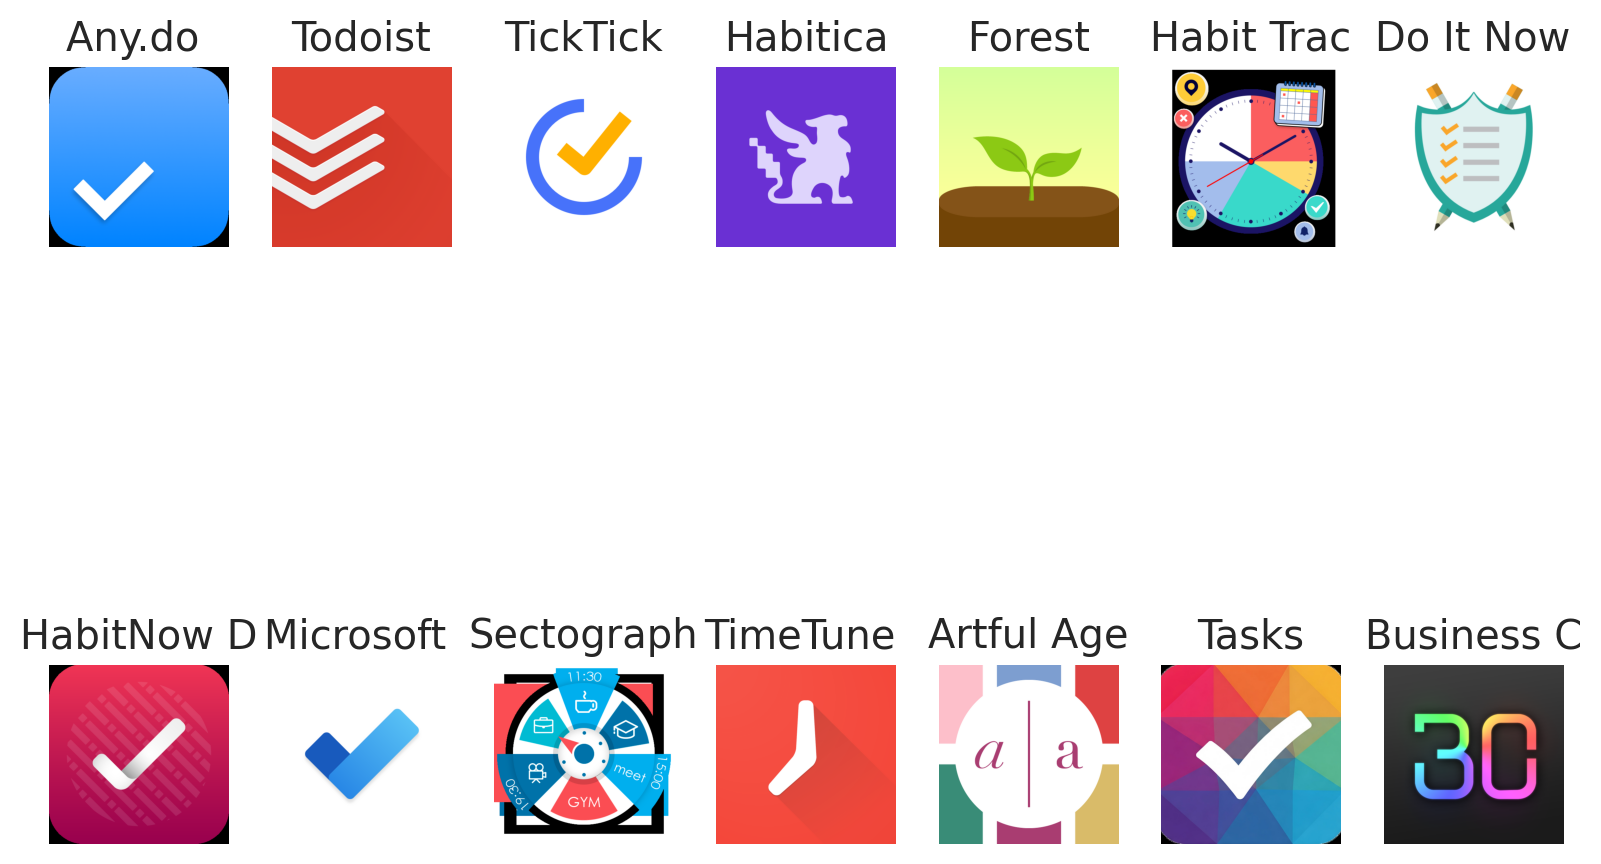

In [25]:
import urllib.request
import numpy as np
from PIL import Image

fig, axs = plt.subplots(2,len(app_infos)//2 , figsize=(8,8))

for i , ax in enumerate(axs.flat):
  ai = app_infos[i]

  with urllib.request.urlopen(ai['icon']) as url:
    img = Image.open(url)  # Open the URL with Pillow
    img = img.convert("RGB")  # Convert to RGB if necessary
    img = np.array(img)

  ax.imshow(img)
  ax.set_title(format_title(ai['title']))
  ax.axis('off')

plt.tight_layout()
plt.show()

In [27]:
app_infos_df = pd.DataFrame(app_infos)
app_infos_df.head(2)

,title,description,descriptionHTML,summary,installs,minInstalls,realInstalls,score,ratings,reviews,...,contentRating,contentRatingDescription,adSupported,containsAds,released,lastUpdatedOn,updated,version,appId,url
0,Any.do - To do list & Calendar,"🥇 <b>""#1 To do list app out there”</b> - WSJ\r...",🥇 <b>&quot;#1 To do list app out there”</b> - ...,"Daily planner with to-do list & tasks, reminde...","10,000,000+",10000000,30855519,4.414472,494630,36068,...,Everyone,None,False,False,"Nov 10, 2011","Mar 23, 2025",1742722944,Varies with device,com.anydo,https://play.google.com/store/apps/details?id=...
1,Todoist: Planner & Calendar,"Trusted by over 47 million people, Todoist is ...","Trusted by over 47 million people, Todoist is ...","Simple yet powerful to do list, habit tracker ...","10,000,000+",10000000,43940984,4.525334,280697,16283,...,Everyone,None,False,False,"Nov 18, 2012","Apr 22, 2025",1745339501,Varies with device,com.todoist,https://play.google.com/store/apps/details?id=...


In [30]:
app_infos_df.to_csv("apps.csv",index=None,header=True)

## Get App Reviews

In [34]:
app_reviews= []

for ap in tqdm(app_packages):
  for score in list(range(1,6)):
    for sort_order in [Sort.MOST_RELEVANT, Sort.NEWEST]:
      rvs, _ = reviews(
      ap,
      lang='en',
      country='us',
      sort=sort_order,
      count=200 if score == 3 else 100,
      filter_score_with=score
  )

      for rv in rvs: # loop through each review dictionary in the rvs list
        # rv is a dictionary representing a single review.
        # Add the 'sortOrder' and 'appId' keys to this dictionary.
        rv['sortOrder'] = 'most_relevant' if sort_order == Sort.MOST_RELEVANT else 'newest'
        rv['appId'] = ap
        app_reviews.append(rv) # Append the modified review dictionary to app_reviews

100%|██████████| 15/15 [00:34<00:00,  2.28s/it]


In [35]:
print_json(app_reviews[0])

{
  "appId": "com.anydo",
  "appVersion": "5.17.0.68",
  "at": "2024-08-26 15:24:11",
  "content": "I had this app for years - rarely used it. Today, somehow, a notification came up that some product was added to my grocery list. I went into this grocery list I never created and found three products, including some Barilla pasta. There was no obvious way to delete or edit it. It referenced my Twitter name, and from your response, it was YOUR collaboration ad that caused it! I immediately deleted this Intrusive app from my phone. NO ONE BUT ME GETS TO PUT LISTS ON MY PHONE. SHAME ON YOU!",
  "repliedAt": "2024-08-27 07:12:46",
  "replyContent": "Just like many similar apps, Any.do collaborated with other services that might be relevant to our users. As such, if you interacted with an ad in another app that offered grocery items then those items were added to Any.do accordingly. These lists can easily be deleted per the details on our Help Center \ud83d\ude42",
  "reviewCreatedVersion": 

In [36]:
app_reviews_df = pd.DataFrame(app_reviews)
app_reviews_df.shape

(17732, 13)

In [37]:
app_reviews_df.head(2)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,a7205dc0-c76e-4124-810f-38cfa482655a,Andrew Poretz,https://play-lh.googleusercontent.com/a-/ALV-U...,I had this app for years - rarely used it. Tod...,1,48,5.17.0.68,2024-08-26 15:24:11,"Just like many similar apps, Any.do collaborat...",2024-08-27 07:12:46,5.17.0.68,most_relevant,com.anydo
1,d482db38-9dd1-419f-9d97-b2eaef3a00f2,Nick,https://play-lh.googleusercontent.com/a/ACg8oc...,I have used any.do on/off for maybe a decade. ...,1,5,None,2024-12-12 22:02:10,Please note that you may cancel your subscript...,2024-12-13 16:19:24,None,most_relevant,com.anydo


In [38]:
app_reviews_df.to_csv('reviews.csv',index=None, header=True)